In [6]:
import numpy as np
import pandas as pd
import datetime as dt

from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

# Wine Quality Dataframe - Machine Learning Project
Progetto a cura di Andrea Chinetti, Gianluca Nogara.

Il Dataframe selezionato tratta la qualità del vino andando ad analizzare i vari componenti.

La prima parte del Dataframe è relativa agli ___acidi___, abbiamo infatti:
- __fixed acidity__: indica i cosiddetti "acidi fissi", diverse tipologie di acidi che variano tra 4,5 e 9 g/s
- __volatile acidity__: indica l'acido acetico, che varia tra 0 e 0,7g/s
- __citrix acid__: indica l'acido citrico, che varia tra 0 e ...

Gli acidi sono tra le sostanze più importanti presenti nel vino, secondi solo ad acqua e alcoli. La presenza di acidi nel vino gli conferisce la caratteristica freschezza al palato, tipica dei vini bianchi e degli spumanti in generale. Un’elevata acidità “alleggerisce” il vino, facendolo sembrare meno corposo, mentre una bassa acidità sottolinea la morbidezza e la struttura del vino.

Troviamo poi le altri elementi tra cui lo ___zucchero residuo___ (__residual sugar__), la quantità di zucchero influenzia la tipologia di vini che possiamo trovare. 

Un _vino secco_ ha un tasso di zuccheri che si attesta sotto ai 9g/l, fino ad arrivare a 250g/l per i _vini dolci_.

Abbiamo poi i ___cloruri___ (__chlorides__), espressi convenzionalmente come grammi di NaCl per litro, per la maggior parte dei vini da tavola il limite massimo è di 1,0 g/litro di NaCl.

Proseguendo con le componenti troviamo l'___anidride solforosa___, utilizzata in enologia per le sue contemporanee azioni antiossidanti e antisettiche, si presenta in due modi nel Dataframe:
- __free sulfur dioxide__: indica la quantità di anidride solforosa che non si combina con il vino e resta libera, che si attesta tra ... e ...
- __total sulfur dioxide__: indica la quantità totale di anidride solforosa, che si attesta tra ... e ... 

In [2]:
#https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009
df = pd.read_csv("winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


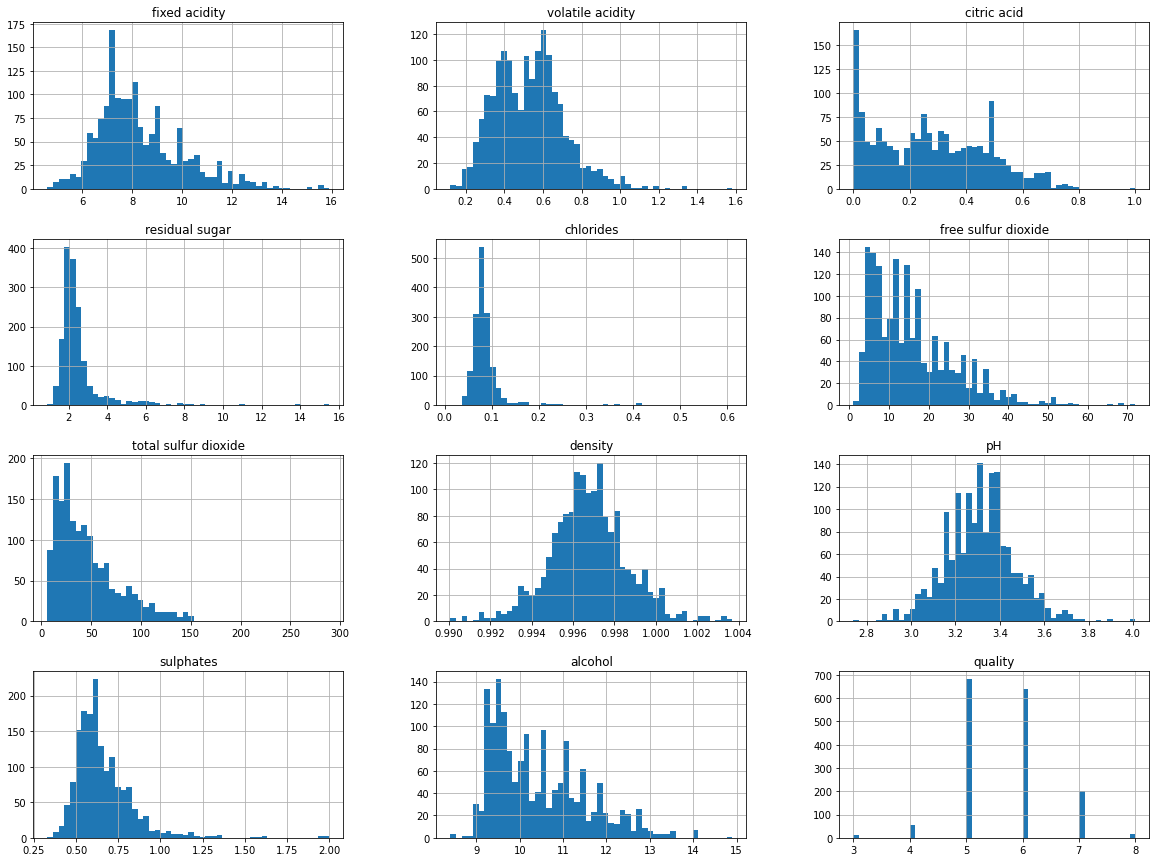

In [7]:
# Visualizzazione grafica della distribuzione dei valori delle features (istogrammi)
df.hist(bins=50, figsize=(20,15))
plt.show()

In [16]:
# Calcolo dei coefficienti di correlazione tra le features
corr_matrix = df.corr()

# Stampa dei coefficienti di correlazione tra le features e "P (kW)"
print(corr_matrix["citric acid"].sort_values(ascending = False))

citric acid             1.000000
fixed acidity           0.671703
density                 0.364947
sulphates               0.312770
quality                 0.226373
chlorides               0.203823
residual sugar          0.143577
alcohol                 0.109903
total sulfur dioxide    0.035533
free sulfur dioxide    -0.060978
pH                     -0.541904
volatile acidity       -0.552496
Name: citric acid, dtype: float64
